In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acts-sectionscsv/acts_sections.csv
/kaggle/input/keycsv/type_name_key.csv
/kaggle/input/keycsv/cases_district_key.csv
/kaggle/input/keycsv/act_key.csv
/kaggle/input/keycsv/disp_name_key.csv
/kaggle/input/keycsv/purpose_name_key.csv
/kaggle/input/keycsv/cases_state_key.csv
/kaggle/input/keycsv/section_key.csv
/kaggle/input/keycsv/cases_court_key.csv
/kaggle/input/keycsv/judge_case_merge_key.csv
/kaggle/input/judges-cleancsv/judges_clean.csv


## Loading the data

In [8]:
import pandas as pd
dataset_cases=pd.read_csv("/kaggle/input/acts-sectionscsv/acts_sections.csv")
dataset_cases.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
0,06-03-02-210100004042014,17353.0,NaN,NaN,1.0,1
1,23-34-01-229900001012019,4759.0,NaN,NaN,NaN,1
2,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1
3,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1
4,01-35-05-203007002652012,17353.0,NaN,NaN,1.0,1


In [2]:
dataset_cases.tail()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
76811352,13-25-04-201300000162017,4650.0,2113918.0,NaN,NaN,0
76811353,13-25-02-201300001002017,10564.0,2113918.0,NaN,NaN,0
76811354,13-25-02-201300001202017,10564.0,2113918.0,NaN,NaN,0
76811355,13-25-02-201300000892017,4650.0,2113918.0,NaN,NaN,0
76811356,13-25-04-201600000382017,4650.0,2113918.0,NaN,NaN,0


In [3]:
import pandas as pd
dataset_judges=pd.read_csv("/kaggle/input/judges-cleancsv/judges_clean.csv")
dataset_judges.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [6]:
dataset_judges.tail()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019
98477,98478,30,2,10,criminal cases,0 nonfemale,28-01-2019,NaN


In [5]:
key_act=pd.read_csv("/kaggle/input/keycsv/act_key.csv")
key_act.head()
key_act.tail()
key_courtcase=pd.read_csv("/kaggle/input/keycsv/act_key.csv")
key_courtcase.head()
key_courtcase.tail()
key_district=pd.read_csv("/kaggle/input/keycsv/cases_district_key.csv")
key_district.head()
key_district.tail()
key_state=pd.read_csv("/kaggle/input/keycsv/cases_state_key.csv")
key_state.head()
key_state.tail()
dip_name_key=pd.read_csv("/kaggle/input/keycsv/disp_name_key.csv")
dip_name_key.head()
dip_name_key.tail()
judge_case_key=pd.read_csv("/kaggle/input/keycsv/judge_case_merge_key.csv")
judge_case_key.head()
judge_case_key.tail()
purpose_name_key=pd.read_csv("/kaggle/input/keycsv/purpose_name_key.csv")
purpose_name_key.head()
purpose_name_key.tail()
section_key=pd.read_csv("/kaggle/input/keycsv/section_key.csv")
section_key.head()
section_key.tail()
typename_key=pd.read_csv("/kaggle/input/keycsv/type_name_key.csv")
typename_key.head()
typename_key.tail()

,year,type_name,type_name_s,count
62709,2018,7529.0,xxxxxspl t.ndps,3
62710,2018,7530.0,zila panchayat act,217
62711,2018,7531.0,zilla panchayat act,17
62712,2018,7532.0,zima 457 cr.p.c.,9
62713,2018,7533.0,zimma application,54


In [7]:
key_act.head()

,act_s,count,act
0,NaN,11282.0,NaN
1,',11160.0,1.0
2,'',20887.0,2.0
3,'Tamil Nadu City Police Act,371.0,3.0
4,"(BOMBAY) NATIONAL PARK ACT, 1950",2.0,4.0


In [8]:
key_courtcase=pd.read_csv("/kaggle/input/keycsv/act_key.csv")
key_courtcase.head()

,act_s,count,act
0,NaN,11282.0,NaN
1,',11160.0,1.0
2,'',20887.0,2.0
3,'Tamil Nadu City Police Act,371.0,3.0
4,"(BOMBAY) NATIONAL PARK ACT, 1950",2.0,4.0


In [9]:
key_courtcase.tail()

,act_s,count,act
29852,xxM.T.RAct,96.0,29852.0
29853,xxP.N.D.T.Act,2245.0,29853.0
29854,xxS.C.E.Act,45.0,29854.0
29855,y,6.0,29855.0
29856,zila parishad,565.0,29856.0


## Creating the DataFrames

In [10]:
import pandas as pd
df_cases=pd.DataFrame(dataset_cases)
df_cases

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
0,06-03-02-210100004042014,17353.0,NaN,NaN,1.0,1
1,23-34-01-229900001012019,4759.0,NaN,NaN,NaN,1
2,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1
3,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1
4,01-35-05-203007002652012,17353.0,NaN,NaN,1.0,1
...,...,...,...,...,...,...
76811352,13-25-04-201300000162017,4650.0,2113918.0,NaN,NaN,0
76811353,13-25-02-201300001002017,10564.0,2113918.0,NaN,NaN,0
76811354,13-25-02-201300001202017,10564.0,2113918.0,NaN,NaN,0
76811355,13-25-02-201300000892017,4650.0,2113918.0,NaN,NaN,0


In [13]:
df_cases[2:5]

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
2,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1
3,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1
4,01-35-05-203007002652012,17353.0,NaN,NaN,1.0,1


In [14]:
df_cases.columns

Index(['ddl_case_id', 'act', 'section', 'bailable_ipc', 'number_sections_ipc',
       'criminal'],
      dtype='object')

In [15]:
df_cases.ddl_case_id

0           06-03-02-210100004042014
1           23-34-01-229900001012019
2           13-18-03-204000030972016
3           23-28-01-220102000232016
4           01-35-05-203007002652012
                      ...           
76811352    13-25-04-201300000162017
76811353    13-25-02-201300001002017
76811354    13-25-02-201300001202017
76811355    13-25-02-201300000892017
76811356    13-25-04-201600000382017
Name: ddl_case_id, Length: 76811357, dtype: object

In [25]:
dataset_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76811357 entries, 0 to 76811356
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ddl_case_id          object 
 1   act                  float64
 2   section              float64
 3   bailable_ipc         object 
 4   number_sections_ipc  float64
 5   criminal             int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.4+ GB


In [ ]:
dataset_cases.describe()

In [18]:
dataset_cases['number_sections_ipc'].describe()

count    2.094575e+07
mean     2.578470e+00
std      1.971519e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      6.700000e+01
Name: number_sections_ipc, dtype: float64

<AxesSubplot:>

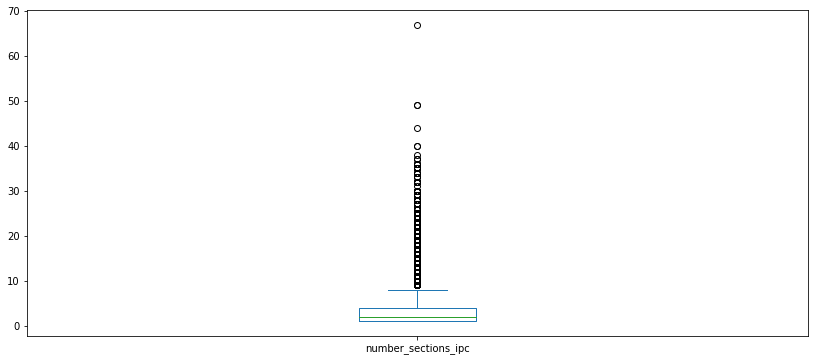

In [19]:
dataset_cases['number_sections_ipc'].plot(kind='box',figsize=(14,6))

<AxesSubplot:>

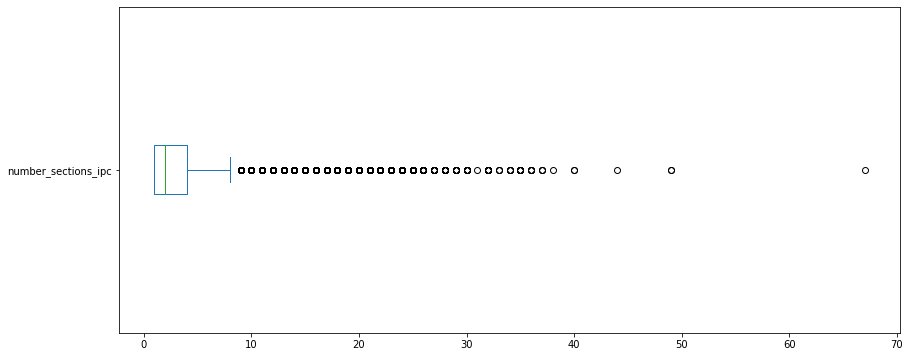

In [20]:
dataset_cases['number_sections_ipc'].plot(kind='box',vert=False,figsize=(14,6))

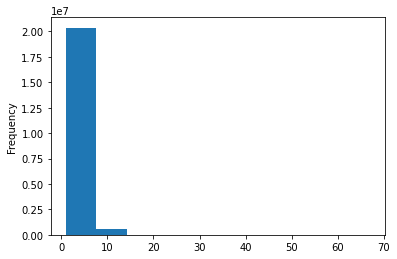

In [2]:
ax=dataset_cases['number_sections_ipc'].plot(kind='hist')

In [3]:
dataset_cases['number_sections_ipc'].value_counts()

1.0     8833128
2.0     3784523
3.0     2992543
4.0     2163182
5.0     1364841
6.0      782721
7.0      450082
8.0      261677
9.0      144554
10.0      77353
11.0      40027
12.0      21532
13.0      11682
14.0       6742
15.0       3799
16.0       2468
17.0       1411
18.0        974
19.0        670
20.0        543
21.0        444
22.0        282
23.0        166
24.0        165
25.0        108
26.0         43
28.0         16
27.0         11
32.0         10
30.0          9
29.0          8
35.0          8
36.0          5
34.0          5
37.0          3
33.0          3
49.0          2
40.0          2
38.0          1
44.0          1
31.0          1
67.0          1
Name: number_sections_ipc, dtype: int64

<AxesSubplot:ylabel='number_sections_ipc'>

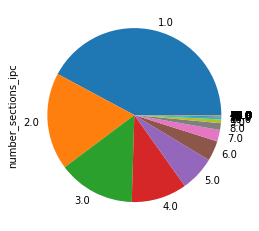

In [4]:
dataset_cases['number_sections_ipc'].value_counts().plot(kind='pie')

In [5]:
dataset_cases['criminal'].describe()

count    7.681136e+07
mean     3.850526e-01
std      4.866077e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: criminal, dtype: float64

<AxesSubplot:>

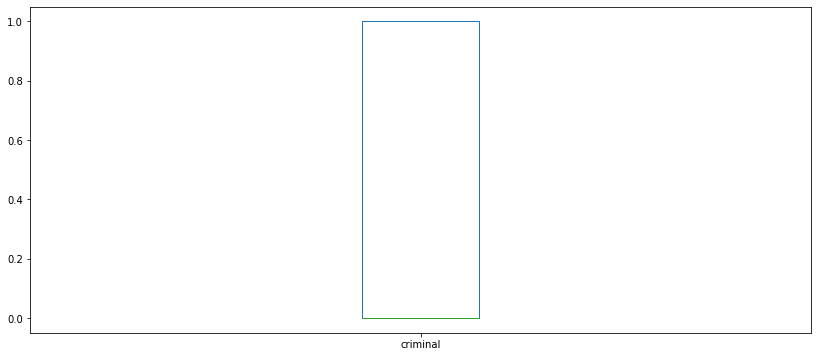

In [6]:
dataset_cases['criminal'].plot(kind='box',figsize=(14,6))

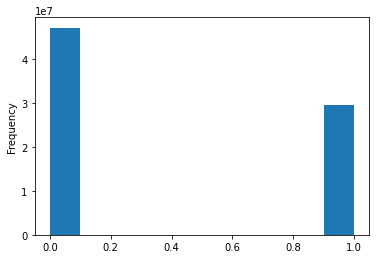

In [7]:
ax=dataset_cases['criminal'].plot(kind='hist')

<AxesSubplot:ylabel='criminal'>

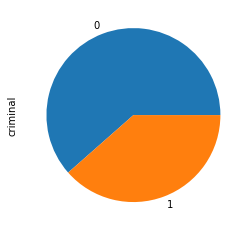

In [8]:
dataset_cases['criminal'].value_counts().plot(kind='pie')

## Insight-1 Finding Correlation between the colunms of the Cases Table

In [10]:
core = dataset_cases.corr()
core

,act,section,number_sections_ipc,criminal
act,1.000000,0.017464,NaN,0.409224
section,0.017464,1.000000,0.179553,0.126533
number_sections_ipc,NaN,0.179553,1.000000,NaN
criminal,0.409224,0.126533,NaN,1.000000


([<matplotlib.axis.YTick at 0x7ff43216ee90>,
 [Text(0, 0, 'act'),
  Text(0, 1, 'section'),
  Text(0, 2, 'number_sections_ipc'),
  Text(0, 3, 'criminal')])

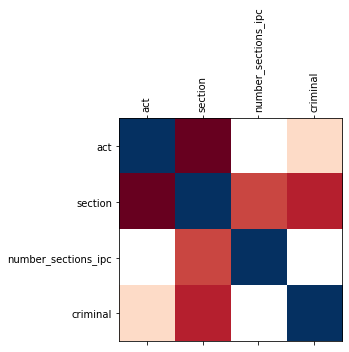

In [11]:
import matplotlib.pyplot as plt
#fig=plt.figure(figsize=(41472,41472))
# ,fignum=fig.number
plt.matshow(core,cmap='RdBu')
plt.xticks(range(len(core.columns)),core.columns,rotation='vertical')
plt.yticks(range(len(core.columns)),core.columns)

<AxesSubplot:xlabel='act', ylabel='criminal'>

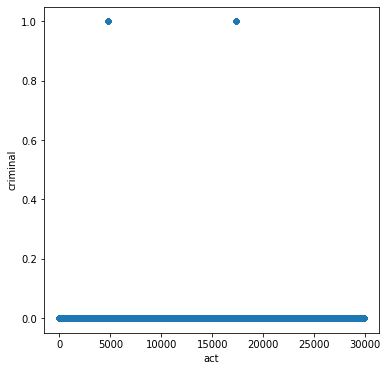

In [12]:
dataset_cases.plot(kind='scatter',x='act',y='criminal',figsize=(6,6))

<AxesSubplot:xlabel='act', ylabel='section'>

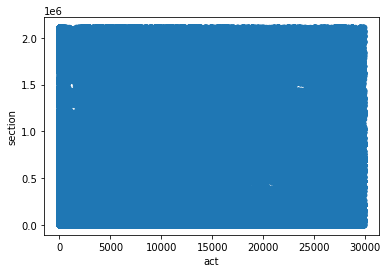

In [13]:
dataset_cases.plot(kind='scatter',x='act',y='section')

<AxesSubplot:xlabel='act', ylabel='criminal'>

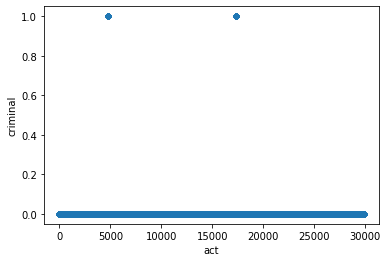

In [14]:
dataset_cases.plot(kind='scatter',x='act',y='criminal')

In [15]:
dataset_judges.describe()

NameError: name 'dataset_judges' is not defined

In [ ]:
dataset_judges['judge_position'].describe()

In [ ]:
dataset_judges['judge_position'].str.count()

In [7]:
import pandas as pd
df_judges=pd.DataFrame(dataset_judges)
df_judges

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


In [ ]:
df_judges['judge_position'].value_counts().to_frame()

In [ ]:
df_judges['judge_position'].value_counts()

In [ ]:
df_judges ['judge_position'].value_counts().plot(kind='pie')

In [ ]:
df_cases

In [ ]:
df_judges

TypeError: 'value' must be an instance of str or bytes, not a float

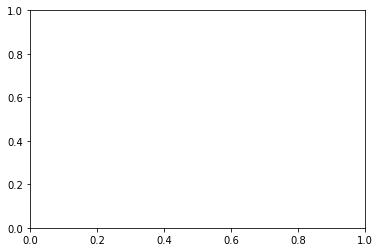

In [8]:
import matplotlib.pyplot as plt
plt.plot(df_judges['female_judge'],df_judges['judge_position'])

In [ ]:
df_judges[(df_judges["judge_position"] == "chief judicial magistrate") & (df_judges["female_judge"] == "1 female")]

In [ ]:
df_judges[(df_judges["judge_position"] == "chief judicial magistrate") & (df_judges["female_judge"] == "0 nonfemale")].count()

In [ ]:
dataset_judges.info()

In [ ]:
df_cases[df_cases['criminal']==1].count()

In [ ]:
df_judges['female_judge'].count()

## Dumb stuff

In [ ]:
dumb = pd.DataFrame({"A" : [0,1,2],"B" : [5,6,7]})

In [ ]:
dumb["A"] != 0

In [ ]:
dumb[dumb["A"] != 0].count()

In [ ]:
df_cases.info()

In [ ]:
df_judges.info()

## Checking for duplicates

In [ ]:
df_cases.duplicated().sum()

In [ ]:
df_judges.duplicated().sum()

Checking if any caseID is null

In [ ]:
df_cases['ddl_case_id'].isna().sum()

In [ ]:
df_cases.describe()

In [ ]:
df_judges.describe()

#### Checking if any JudgeID is null

In [ ]:
df_judges['ddl_judge_id'].isna().sum()

In [ ]:
df_cases.isna().sum()

In [ ]:
df_judges.isna().sum()

In [ ]:
df_judges[(df_judges['female_judge']=='1 female')& (df_judges['judge_position']=='criminal cases')]

In [ ]:
df_judges[(df_judges['female_judge']=='0 nonfemale')& (df_judges['judge_position']=='criminal cases')]

<AxesSubplot:>

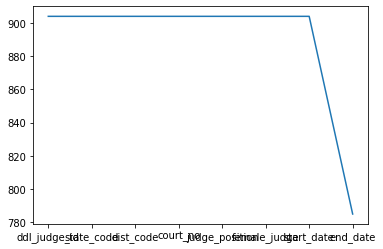

In [9]:
df_judges[df_judges['judge_position']=='criminal cases'].count().plot()

In [10]:
plot = df_judges.plot.pie(y=df_judges['female_judge'].count())
plot

IndexError: index 98477 is out of bounds for axis 0 with size 8

In [ ]:
df_judges['female_judge'].apply(lambda x : True if '1 female' else False)

In [ ]:
df_judges[df_judges['female_judge'].apply(lambda x : True if '1 female' else False)]

In [11]:
for i, row in df_judges.iterrows():
    if row['female_judge'] == "1 female":
        df_judges.at[i,'female_judge'] = True
    else:
        df_judges.at[i,'female_judge'] = False

In [12]:
df_judges

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,False,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,False,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,False,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,False,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,False,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,True,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,True,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,True,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,True,15-05-2017,28-01-2019


In [13]:
view=df_judges.sort_values(by=['start_date'],na_position='first')
view

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
28186,28187,3,11,997,civil judge senior division,False,01-01-1995,25-05-1997
53977,53978,11,1,5,district and sessions court,False,01-01-2000,09-08-2015
78278,78279,17,13,14,city civil and sessions court,False,01-01-2000,20-02-2000
33759,33760,4,4,4,munsiff first class court,False,01-01-2000,12-05-2015
79091,79092,17,13,21,city civil and sessions court,True,01-01-2000,20-02-2000
...,...,...,...,...,...,...,...,...
42946,42947,8,21,7,judicial magistrate court,False,31-12-2019,10-02-2020
41390,41391,8,4,1,district and sessions court,False,31-12-2019,14-02-2020
40911,40912,8,2,2,principal judge family court,False,31-12-2019,17-02-2020
43321,43322,8,24,25,1-district and sessions court,False,31-12-2019,14-02-2020


In [14]:
view2=view.groupby(['start_date'])
view2.first()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,end_date
start_date,,,,,,,
01-01-1995,28187,3,11,997,civil judge senior division,False,25-05-1997
01-01-2000,53978,11,1,5,district and sessions court,False,09-08-2015
01-01-2001,31393,3,23,337,principal civil judge senior division,False,08-12-2003
01-01-2002,29640,3,18,482,principal district and sessions court,False,27-11-2003
01-01-2003,21718,1,38,34,small cause court,False,13-06-2004
...,...,...,...,...,...,...,...
31-12-2015,40960,8,2,7,1-additional chief judicial magistrate,False,23-01-2016
31-12-2016,31741,3,24,265,principal civil judge,False,04-03-2017
31-12-2017,88336,23,3,6,district and sessions court,False,04-12-2018


In [ ]:
for i in view2.groups.keys():
    print(view2.get_group(i).apply()   

In [15]:
view=df_judges.sort_values(by=['start_date'],ascending=True,na_position='first')
view

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
28186,28187,3,11,997,civil judge senior division,False,01-01-1995,25-05-1997
53977,53978,11,1,5,district and sessions court,False,01-01-2000,09-08-2015
78278,78279,17,13,14,city civil and sessions court,False,01-01-2000,20-02-2000
33759,33760,4,4,4,munsiff first class court,False,01-01-2000,12-05-2015
79091,79092,17,13,21,city civil and sessions court,True,01-01-2000,20-02-2000
...,...,...,...,...,...,...,...,...
42946,42947,8,21,7,judicial magistrate court,False,31-12-2019,10-02-2020
41390,41391,8,4,1,district and sessions court,False,31-12-2019,14-02-2020
40911,40912,8,2,2,principal judge family court,False,31-12-2019,17-02-2020
43321,43322,8,24,25,1-district and sessions court,False,31-12-2019,14-02-2020


In [16]:
view=df_judges.sort_values(by=['start_date','female_judge'],na_position='first')
view

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
28186,28187,3,11,997,civil judge senior division,False,01-01-1995,25-05-1997
26789,26790,3,4,326,principal civil judge,False,01-01-2000,26-05-2001
26801,26802,3,4,327,principal civil judge,False,01-01-2000,19-07-2000
33759,33760,4,4,4,munsiff first class court,False,01-01-2000,12-05-2015
53977,53978,11,1,5,district and sessions court,False,01-01-2000,09-08-2015
...,...,...,...,...,...,...,...,...
41402,41403,8,4,2,principal judge family court,False,31-12-2019,14-02-2020
42941,42942,8,21,7,additional district and sessions court,False,31-12-2019,03-02-2020
42946,42947,8,21,7,judicial magistrate court,False,31-12-2019,10-02-2020
42973,42974,8,21,14,additional district and sessions court,False,31-12-2019,28-02-2020


In [18]:
view=df_judges.sort_values(by=['start_date'],na_position='first')
view

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
28186,28187,3,11,997,civil judge senior division,False,01-01-1995,25-05-1997
53977,53978,11,1,5,district and sessions court,False,01-01-2000,09-08-2015
78278,78279,17,13,14,city civil and sessions court,False,01-01-2000,20-02-2000
33759,33760,4,4,4,munsiff first class court,False,01-01-2000,12-05-2015
79091,79092,17,13,21,city civil and sessions court,True,01-01-2000,20-02-2000
...,...,...,...,...,...,...,...,...
42946,42947,8,21,7,judicial magistrate court,False,31-12-2019,10-02-2020
41390,41391,8,4,1,district and sessions court,False,31-12-2019,14-02-2020
40911,40912,8,2,2,principal judge family court,False,31-12-2019,17-02-2020
43321,43322,8,24,25,1-district and sessions court,False,31-12-2019,14-02-2020


In [19]:
view2 = view.sort_values(by = ['female_judge','start_date'],ascending=True,na_position='first')
view2

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
28186,28187,3,11,997,civil judge senior division,False,01-01-1995,25-05-1997
53977,53978,11,1,5,district and sessions court,False,01-01-2000,09-08-2015
78278,78279,17,13,14,city civil and sessions court,False,01-01-2000,20-02-2000
33759,33760,4,4,4,munsiff first class court,False,01-01-2000,12-05-2015
78908,78909,17,13,19,city civil and sessions court,False,01-01-2000,20-02-2000
...,...,...,...,...,...,...,...,...
36288,36289,5,5,4,district and sessions court,True,31-12-2018,NaN
8220,8221,1,18,34,chief judicial magistrate,True,31-12-2018,NaN
41706,41707,8,6,83,14-additional district and sessions court,True,31-12-2018,NaN
36269,36270,5,5,3,district and sessions court,True,31-12-2018,NaN


In [20]:
 def counter(view,value: bool):   
    state = {}
    count = 0
    for i, row in view.iterrows():
        if row['state_code'] not in state.keys():
            state[row['state_code']]=0
            if row['female_judge'] == value:
                state[row['state_code']] = 1
        else:      
            if row['female_judge'] == value:
                state[row['state_code']] += 1   
    return state

In [21]:
counter(view2,False)

{3: 4751,
 11: 1364,
 17: 5112,
 4: 2243,
 1: 16209,
 10: 2407,
 23: 4405,
 30: 173,
 20: 321,
 8: 3849,
 9: 3731,
 29: 1702,
 22: 1148,
 2: 2282,
 12: 762,
 13: 11093,
 24: 70,
 19: 20,
 5: 663,
 14: 1514,
 6: 965,
 7: 2057,
 15: 658,
 16: 1890,
 18: 696,
 26: 982,
 25: 64,
 27: 89,
 21: 56}

In [22]:
counter(view2,True)

{3: 2064,
 11: 674,
 17: 2249,
 4: 864,
 1: 6231,
 10: 1309,
 23: 1224,
 30: 164,
 20: 123,
 8: 275,
 9: 1702,
 29: 887,
 22: 793,
 2: 1226,
 12: 148,
 13: 2945,
 24: 97,
 19: 24,
 5: 252,
 14: 824,
 6: 613,
 7: 228,
 15: 424,
 16: 812,
 18: 344,
 26: 514,
 25: 49,
 27: 51,
 21: 92}

In [20]:
import matplotlib.pyplot as plt

In [23]:
state_map = {}
for i,row in key_state.iterrows():
    if row['state_code'] not in state_map.keys():
        state_map[row['state_code']] = row['state_name']
state_map

{2: 'Andhra Pradesh',
 29: 'Telangana',
 6: 'Assam',
 8: 'Bihar',
 27: 'Chandigarh',
 18: 'Chhattisgarh',
 32: 'DNH at Silvasa',
 31: 'Diu and Daman',
 30: 'Goa',
 17: 'Gujarat',
 14: 'Haryana',
 5: 'Himachal Pradesh',
 33: 'Ladakh',
 12: 'Jammu and Kashmir',
 7: 'Jharkhand',
 3: 'Karnataka',
 4: 'Kerala',
 23: 'Madhya Pradesh',
 1: 'Maharashtra',
 25: 'Manipur',
 21: 'Meghalaya',
 19: 'Mizoram',
 26: 'Delhi',
 11: 'Orissa',
 22: 'Punjab',
 9: 'Rajasthan',
 24: 'Sikkim',
 10: 'Tamil Nadu',
 20: 'Tripura',
 13: 'Uttar Pradesh',
 15: 'Uttarakhand',
 16: 'West Bengal'}

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


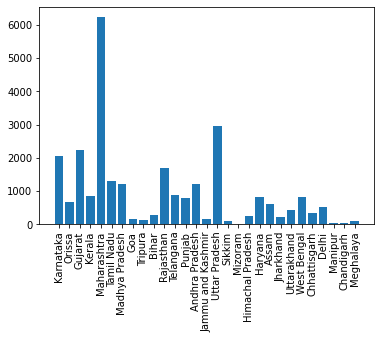

In [24]:
x=[]
y=[]
count_fem = counter(view2,True)
for i in count_fem.keys():
    x.append(state_map[i])
    y.append(count_fem[i])
plt.bar(x,y)
print(plt.xticks(rotation='vertical')[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


Text(0.5, 1.0, 'Male / female ratio across the states')

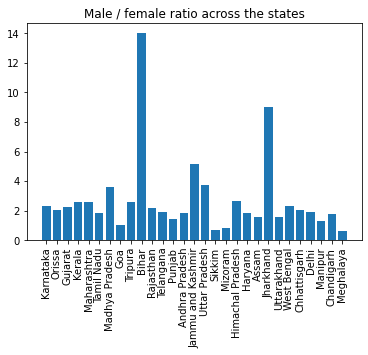

In [25]:
x=[]
y=[]
count_m = counter(view2,False)
for i in count_m.keys():
    x.append(state_map[i])
    y.append(float(count_m[i]/count_fem[i]))
plt.bar(x,y)
print(plt.xticks(rotation='vertical')[0])
plt.title('Male / female ratio across the states')

In [ ]:
df_cases

In [26]:
df_cases_nonull=df_cases.dropna()
df_cases_nonull

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
9362477,03-28-05-200300012102011,17353.0,32072.0,not applicable to section,1.0,1
9362514,01-23-05-200668003252015,17353.0,32072.0,not applicable to section,1.0,1
9362712,13-55-05-203500001272015,17353.0,32072.0,not applicable to section,1.0,1
9362734,14-05-03-204200062032018,17353.0,32072.0,not applicable to section,4.0,1
9362772,23-20-02-220601011002011,17353.0,32072.0,not applicable to section,4.0,1
...,...,...,...,...,...,...
69935167,13-15-05-204800000022017,17353.0,1375166.0,not applicable to section,1.0,1
69935170,13-06-02-207100022452018,17353.0,1375166.0,not applicable to section,1.0,1
69935182,13-67-05-205500000062018,17353.0,1375166.0,not applicable to section,1.0,1
69935186,13-67-04-205506000082017,17353.0,1375166.0,not applicable to section,1.0,1


In [27]:
df_judges_nonull=df_judges.dropna()
df_judges_nonull

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,False,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,False,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,False,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,False,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,False,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98471,98472,30,2,8,criminal cases,True,04-04-2016,15-12-2016
98473,98474,30,2,9,criminal cases,True,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,True,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,True,09-12-2016,31-07-2017


In [28]:
for i, row in df_judges_nonull.iterrows():
    if row['female_judge'] == "1 female":
        df_judges_nonull.at[i,'female_judge'] = True
    else:
        df_judges_nonull.at[i,'female_judge'] = False

In [ ]:
df_cases['bailable_ipc'].unique()

<AxesSubplot:ylabel='ddl_case_id'>

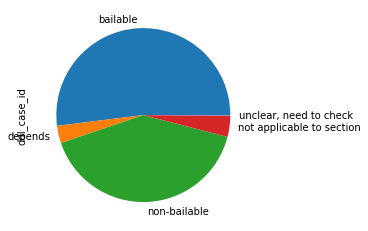

In [29]:
count = df_cases.groupby('bailable_ipc')['ddl_case_id'].count().plot(kind='pie')
count

In [30]:
count = df_cases.groupby('bailable_ipc')['ddl_case_id'].count()
count

bailable_ipc
bailable                     9294730
depends                       578466
non-bailable                 7285069
not applicable to section     699755
unclear, need to check         23406
Name: ddl_case_id, dtype: int64

In [31]:
total_cases_count=df_cases['ddl_case_id'].count()
total_cases_count

76811357

## CLASSIFICATION

### Importing required packages

In [32]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Making a training dataset

In [33]:
df_judges_nonull['judge_position'].unique()

array(['chief judicial magistrate', 'civil judge junior division',
       'civil judge senior division', 'district and sessions court',
       'criminal cases', 'civil judge', 'judicial magistrate court',
       'civil court', 'motor accidents claims tribunal', 'railway ner',
       'small cause court', 'gram nyayalaya', 'additional district judge',
       'juvenile court', 'additional district and sessions court', 'jmfc',
       'commercial court', 'district and additional sessions court',
       'additional metropolitan magistrate',
       'chief metropolitan magistrate', 'junior division',
       'cantonment court', 'municipal court',
       'city district and sessions court', 'fast track court',
       'industrial court', 'labour court', 'cooperative court',
       'family court', 'school tribunal', '2-district and sessions court',
       'jcj court, puttaparthy', 'jcj courts, satyavedu',
       'principal civil judge junior division', '3-jmfc',
       'additional civil judge junio

In [34]:
df_cases_nonull['bailable_ipc'].unique()

array(['not applicable to section', 'depends', 'non-bailable', 'bailable',
       'unclear, need to check'], dtype=object)

In [35]:
df_cases_filtered = df_cases_nonull[~df_cases_nonull['bailable_ipc'].isin(['depends','not applicable to section','unclear, need to check'])]

In [36]:
df_cases_filtered

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
10808551,03-21-12-201200004872014,17353.0,82488.0,non-bailable,1.0,1
10808593,08-38-01-215700000812018,17353.0,82488.0,non-bailable,2.0,1
10808594,01-19-04-203600002042020,17353.0,82488.0,non-bailable,1.0,1
10808613,23-47-01-221824085082015,17353.0,82488.0,non-bailable,4.0,1
10808614,13-24-02-202600000402018,17353.0,82488.0,non-bailable,1.0,1
...,...,...,...,...,...,...
63819474,13-49-03-205900079422017,17353.0,1190619.0,bailable,1.0,1
63819476,13-01-03-202000106782019,17353.0,1190619.0,bailable,1.0,1
63819477,13-44-03-202012134892019,17353.0,1190619.0,bailable,1.0,1
63819478,13-31-08-206000001672018,17353.0,1190619.0,bailable,1.0,1


In [37]:
quality=LabelEncoder()
df_cases_filtered['bailable_ipc'].unique()
df_cases_filtered

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
10808551,03-21-12-201200004872014,17353.0,82488.0,non-bailable,1.0,1
10808593,08-38-01-215700000812018,17353.0,82488.0,non-bailable,2.0,1
10808594,01-19-04-203600002042020,17353.0,82488.0,non-bailable,1.0,1
10808613,23-47-01-221824085082015,17353.0,82488.0,non-bailable,4.0,1
10808614,13-24-02-202600000402018,17353.0,82488.0,non-bailable,1.0,1
...,...,...,...,...,...,...
63819474,13-49-03-205900079422017,17353.0,1190619.0,bailable,1.0,1
63819476,13-01-03-202000106782019,17353.0,1190619.0,bailable,1.0,1
63819477,13-44-03-202012134892019,17353.0,1190619.0,bailable,1.0,1
63819478,13-31-08-206000001672018,17353.0,1190619.0,bailable,1.0,1


### Bailable cases have a value 0 and else 1

In [38]:
count = df_cases_filtered.groupby('bailable_ipc').count()
count

,ddl_case_id,act,section,number_sections_ipc,criminal
bailable_ipc,,,,,
bailable,9294730,9294730,9294730,9294730,9294730
non-bailable,7285069,7285069,7285069,7285069,7285069


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bailable_ipc', ylabel='count'>

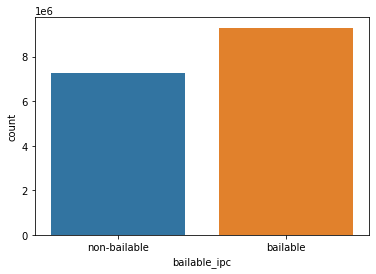

In [39]:
sns.countplot(df_cases_filtered['bailable_ipc'])

In [87]:
X=df_cases_filtered.drop('bailable_ipc',axis=1)
y=df_cases_filtered['bailable_ipc']

In [86]:
X.shape

(16579799, 5)

In [88]:
#train and test splitting of data
X_train,Y_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df_cases_filtered.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df_cases_filtered.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=df_cases_filtered.index, columns=df_cases_filtered.columns)

## Random Forest Classifier